Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    

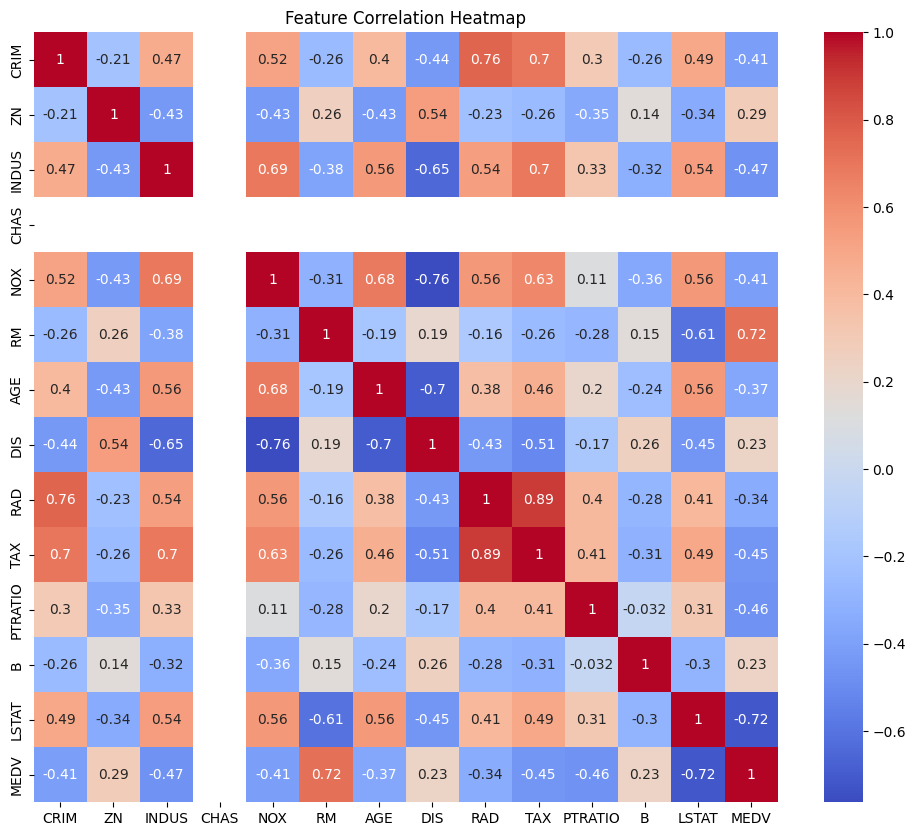

Mean Squared Error (MSE): 23.193129393256008
R² Score: 0.6369576181720193


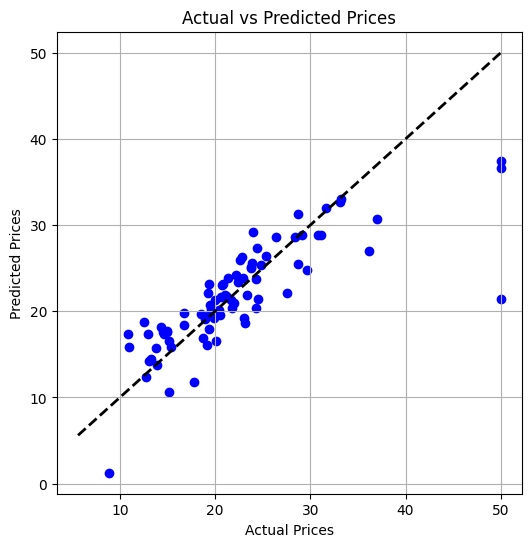

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

warnings.filterwarnings("ignore")  # Ignore all warnings

# Load dataset
df = pd.read_csv("Downloads/HousingData.csv")
print("Initial Data Overview:")
print(df.info())
print(df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Handling missing values
# Categorical
df["CHAS"].fillna(df["CHAS"].mode()[0], inplace=True)

# Numerical
features = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
for feature in features:
    df[feature].fillna(df[feature].median(), inplace=True)

print("\nMissing values after filling:\n", df.isnull().sum())

# ===============================
# 📌 Detecting and Removing Outliers
# ===============================
print("\nOutlier Removal using Z-score for numerical columns...")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_cleaned = df[(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]
print(f"Rows before: {df.shape[0]}, after outlier removal: {df_cleaned.shape[0]}")

# ===============================
# 🔢 Feature Scaling (Normalization)
# ===============================
X = df_cleaned.drop(columns=["MEDV"])
y = df_cleaned["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 🔍 Train-Test Split & Model Training
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ===============================
# 📊 Heatmap of Correlation
# ===============================
plt.figure(figsize=(12, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ===============================
# 📈 Model Evaluation
# ===============================
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()
